# Cloud Computing Notes

## IP Address

### Private IPs
* 10.0.0.0/8
* 172.16.0.0/12
* 192.168.0.0/16

### Static IP
* Can be switched to another VM instance in the same project

## Key Terms

* **Availability**: Uptime
* **Failover**: Switching to a backup system in case of failure
* **Durability**: No data lost
* **Point in Time**: Snapshot in a point in time, used for recovery
* **RTO (Recovery Time Objective)**: Maximum downtime tolerable
* **RPO (Recovery Point Objective)**: Data freshness, maximum data lost tolerable

## Compute Engine

* **Startup Script**: Used for bootstrapping instances
* **Instance Template**: Used to create VM and Managed Instance Groups, cannot be edited
* **Custom Image**: Faster boot times, can be created from VM instance
* **Preemptible VM**: Spot VMs, cheaper but can be terminated at any time

## gcloud Commands

* **App Engine**: `gcloud app`
* **Compute Engine**: `gcloud compute`
* **Kubernetes**: `gcloud container`
* **Cloud Run**: `gcloud run`

### Deployment Commands

* **Cloud Run**: `gcloud run deploy`
* **App Engine**: `gcloud app deploy`
* **Compute Engine**: `gcloud compute instances create`
* **Kubernetes**: `gcloud container clusters create`

## Static IP Address

* Constant external IP address
* Can be switched from one VM instance to another

## Managed Instance Group

* Must use instance template
* Features:
  * Auto-scaling based on metrics (CPU utilization, load balancing utilization)
  * Autohealing with health checks
  * Regional MIGs available
  * Load balancing
  * Rolling updates and canary deployments

## Cloud Load Balancing

* Enables high availability and auto-scaling
* Network layer: IP
* Transport layer: TCP (reliability), UDP (performance)

## Cloud Service Models

* **IaaS (Infrastructure as a Service)**: Only infrastructure provided, user manages everything else (e.g. VM)
* **PaaS (Platform as a Service)**: User configures and provides application code
  * **FaaS (Function as a Service)**: Functions instead of apps
  * **CaaS (Container as a Service)**: Containers instead of apps
* **Serverless**: No infrastructure management, pay for usage only



## App Engine

* Serverless platform, no need to provision servers
* Runs in Docker containers
* Features:
  * Automatic autoscaling based on target CPU utilization, throughput utilization, and max concurrent requests
  * Configure max and min instances
  * Basic scaling: instances shut down when idle, auto load balancing, and application health monitoring
  * Application versioning and traffic splitting
  * Manual = Config number of instance to run
* Regional, Cannot change an application's region



## Kubernetes Engine

* **Managed Kubernetes Service**: Google Kubernetes Engine (GKE) provides a managed platform for Kubernetes
* **Storage Support**:
  * Persistent disks
  * Local SSDs
* **Cluster**: A group of nodes (machines) that run Kubernetes
* **Pods**: Basic execution unit in Kubernetes, comprising one or more containers
  * Ephemeral, can be created, scaled, and deleted as needed
  * Can be managed by Deployments, ReplicaSets, or StatefulSets
* **Key Components**:
  * **Nodes**: Machines that run pods
  * **Deployments**: Manage rollouts and rollbacks of pods
  * **Services**: Provide a stable network identity for accessing pods
  * **Persistent Volumes (PVs)**: Provide persistent storage for data
  * **One Deployment per Microservice**: Each microservice is typically managed by its own Deployment
  * **Ensures Desired Replicas**: Maintains a specified number of replicas (identical pods) at any given time

  # Services in Kubernetes

* **Abstracts Pod IPs**: Provides a stable network identity for accessing pods, even when pod IPs change
* **Ensures External Access**: Allows external users to access pods without worrying about pod failures or replacements

## Types of Services

* **ClusterIP**: Exposes service on a cluster-internal IP, only accessible within the cluster
  * Use case: Intra-cluster communication between microservices
* **LoadBalancer**: Exposes service externally using a cloud provider's load balancer
  * Use case: Create individual load balancers for each microservice
* **NodePort**: Exposes service on each node's IP at a static port
  * Use case: No external load balancer for each microservice, can use Ingress instead

## Creating a Service

* `kubectl expose deployment <name> --type=LoadBalancer --port=80`

By creating a Service, you can ensure that external users are not impacted when:
* A pod fails and is replaced by a ReplicaSet
* A new release happens and existing pods are replaced by new ones

The Service provides a stable IP address and DNS name, abstracting the underlying pod IPs.

* Deployment → ReplicaSet → Pods(managed by ReplicaSet) → Services
* Deployment: Ensures that a specified number of pods are running with a specific configuration, and manages rollouts and rollbacks of new versions.

# Container Image Storage

* **Container Registry**: A fully-managed container registry provided by GCP (or other cloud providers) to store and manage Docker images.
* **Alternative**: Docker Hub or other third-party container registries.

## Key Benefits

* **Integration with CI/CD**: Container registries can be integrated with CI/CD tools to automate the build, test, and deployment of container images.
* **Security**: Container registries provide features to:
  * Analyze images for vulnerabilities
  * Enforce deployment policies
  * Secure container images

By storing container images in a registry, you can manage and deploy your microservices more efficiently and securely.

# Creating Docker Image

## Steps:

* **Build Image**: `docker build -t in28min/hello-world-rest-api:0.0.1.RELEASE .`
* **Test it Locally**: `docker run -d -p 8080:8080 in28min/hello-world-rest-api:0.0.1.RELEASE`
* **Push it to Container Repository**: `docker push in28min/hello-world-rest-api:0.0.1.RELEASE`

## How do we run services on nodes for log collection or monitoring?
* **DaemonSet**: One pod on every node for background services
  * Log collection
  * Monitoring
* **Cloud Monitoring and Cloud Logging**
  * Cloud Logging System and Application Logs can be exported to:
    * Big Query
    * Pub/Sub

* Cluster(Hardware) → Deployment → ReplicaSet → Pods(managed by ReplicaSet) → Services
* Deployment: Ensures that a specified number of pods are running with a specific configuration, and manages rollouts and rollbacks of new versions.

## gcloud VS Kubectl
* **Gcloud is for cluster management, aka hardware provision**
  * Create Cluster
  * Resize Cluster
  * Autoscale Cluster
  * Delete Cluster
  * Adding Node Pool
  * List Images

* **kubectl is for Software Side**
  * List Pods/Service/Replica Sets
  * Create Deployment 
  * Create Service
  * Scale Deployment
  * Autoscale Deployment
  * Delete Deployment
  * Update Deployment
  * Rollback Deployment

## Cloud Function

* Run code in response to events
* No Server Management
* Automatically scale up and down, Horizontally
* TIME BOUND
* 1st gen: each function only serve one request at a time!
* 2nd gen: Concurrency. 1000 instances per function

* **Problem:** Cold Start
    * Initialisation slow

## Data States

* Data at Rest
* Data in Motion
* Data in Use

## Encryption

### Asymmetric Key Encryption

* Encrypt data with Public Key
* Decrypt with Private Key

## Cloud KMS

Create and manage cryptographic keys (symmetric and
asymmetric)

Control their use in your applications and GCP Services

Provides an API to encrypt, decrypt, or sign data

* Google-managed key: No configuration required
* Customer-managed key: Use key from KMS
* Customer-supplied key: Provide your own key

## Storage

* hard disk is block storage
* if you want to share files, use file storage

## Block Storage
* Typically one block storage attached to one Virtual server

### **Persistent Disk**: Network Block Storage
* Network block storage attached to your VM instance
* Provisioned capacity
  * Flexible: Increase size when you need it, Scale horizontally
* Zonal
* Regional cost 2x more
* More durable
* Lifecycle NOT tied to VM instance
* Use Case: Run custom Database

#### **Point-in-time Snapshots**
* Incremental: each snapshot only contains changes from previous one
* If you delete one, it won't affect other snapshots
* Creating Snapshot from disk is faster than creating from image
* BUT Creating disk from Image is faster than snapshot

#### **Machine Image**
* One VM can have multiple PDs
  * Machine Image contains everything: config, Metadata, Permission, Data ALL Disks

### **Local SSDs**: Local Block Storage
* Temporary Data ONLY (Ephemeral)
  * Enable live migration for data to survive maintenance events
* Lifecycle Tied to VM instance
* **Attributes:**
  * Physically attached to host of VM instance
    * Provide very high IOPS and low latency

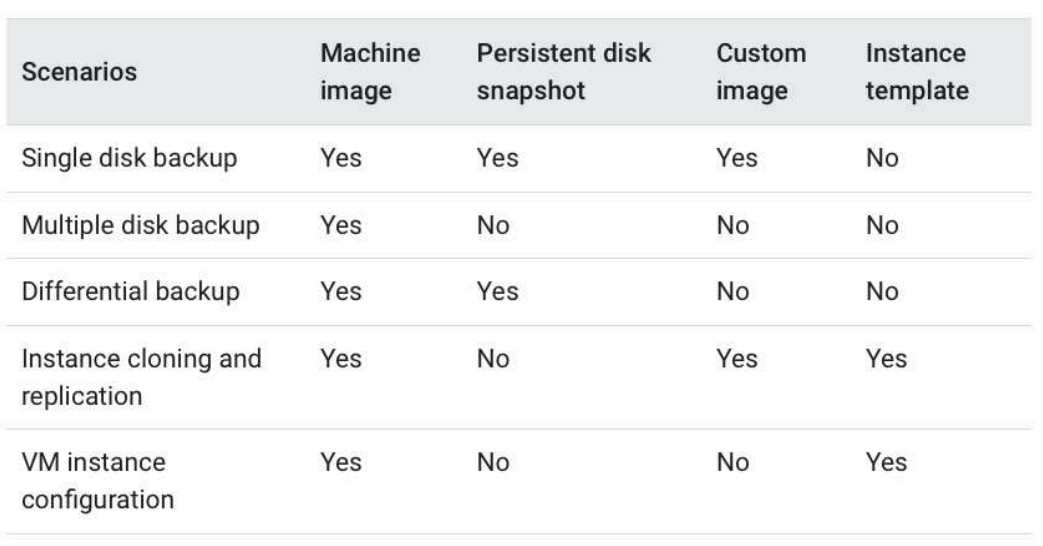

## Cloud FileStore
* Provisioned Capacity
* high performance workloads

## Cloud Storage : AKA Object Storage
* Most popular, very flexible & inexpensive storage service
    * Serverless: Autoscaling and infinite scale
* Use Key: Value approach
* Store all file types
* Stored in Buckets
    * max size is 5TB
* durability: 99.999999999%(11 9’s)

### Object versioning
* enabled at bucket level(configurable)
* **LIVE Version** is the latest version

### Object Lifecycle Management
* save costs by moving files automatically between storage classes
    * Metrics: Age, CreatedBefore, IsLive, MatchesStorageClass, NumberOfNewerVersions etc
* **Actions**: 
    * SetStorageClass
    * Deletion

### Encryption
* pg 182

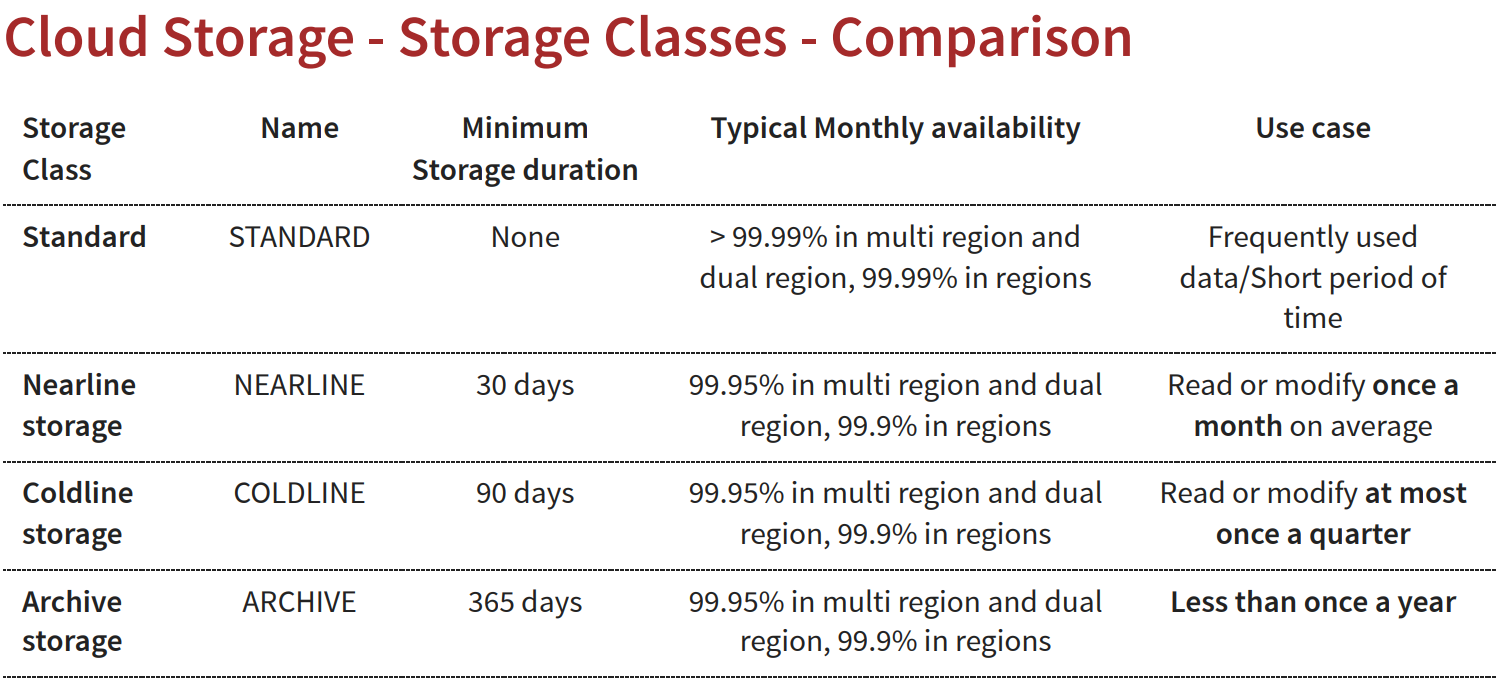